<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Aula**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Aulas**

## 0\. Estruturas de dados

*   <font color='red'>**Não estruturado**</font>: texto, imagem, aúdio, etc.
*   **Semi estruturado**: html, json, etc.
*   **Estruturado**: tabelas, planilhas, etc.



## 1\. Pacote Seaborn

**Seaborn** é um dos pacotes Python mais utilizados para visualização de dados. A documentação pode ser encontrada neste [link](https://seaborn.pydata.org/index.html). Possui diversas opções gráficos (barra, setores, linha, área, etc.) e uma excelente integração com os DataFrames do pacote Python Pandas. 

> O **Seaborn** usa o **Matplotlib** ([link](https://matplotlib.org/) da documentação), outro pacote bastante utilizada para visualização de dados.

### **1.1. Visualização** 

**Exemplo**: Valor da gorgeta em um restaurante (exemplo padrão do pacote).

In [1]:
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
data = sns.load_dataset("tips")

In [4]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


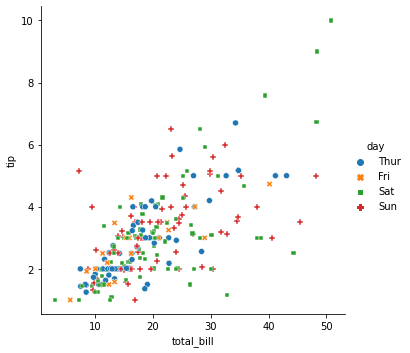

In [5]:
sns.relplot(data=data,x="total_bill", y="tip", hue="day", style="day")

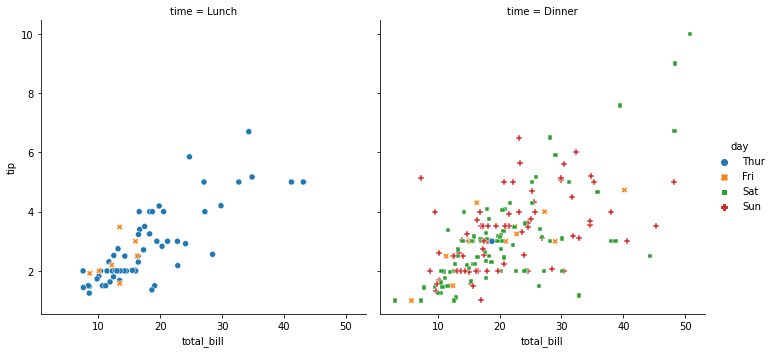

In [6]:
sns.relplot(data=data,x="total_bill", y="tip", hue="day", style="day", col="time")

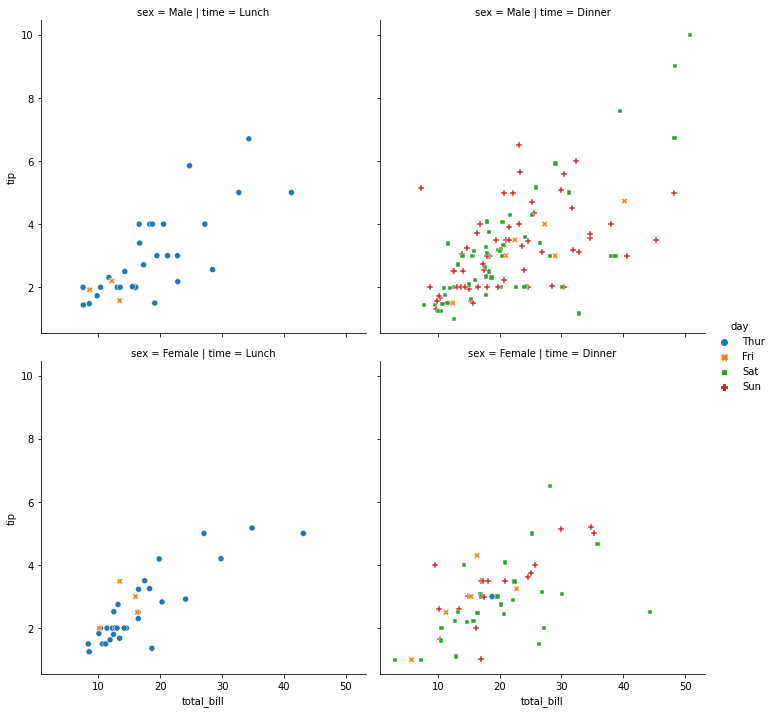

In [7]:
sns.relplot(data=data,x="total_bill", y="tip", hue="day", style="day", col="time", row="sex")

### **1.2. Elementos** 

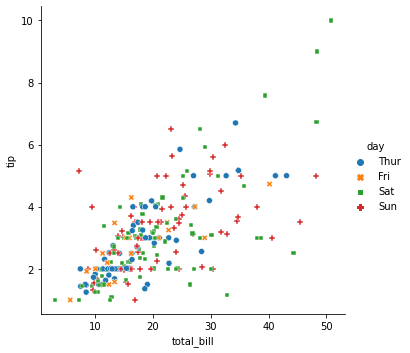

In [8]:
grafico = sns.relplot(data=data,x="total_bill", y="tip", hue="day", style="day")

* **Títulos e Eixos:**

> Documentação completa com todas as opções de manipulação do texto neste [link](https://matplotlib.org/3.1.1/api/text_api.html).

In [9]:
grafico.ax.set_title("Gorjetas", fontsize=12, fontweight="bold");
grafico.set_xlabels("Valor da conta (USD)", fontsize=10);
grafico.set_ylabels("Valor da gorjeta (USD)", fontsize=10);

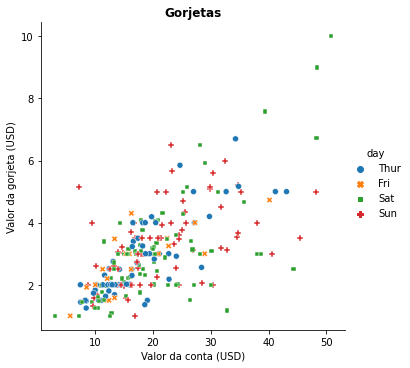

In [10]:
grafico.fig

* **Legenda**

In [11]:
grafico.legend.set_title("Dias da semana", prop={"size": 10, "weight": "bold"});

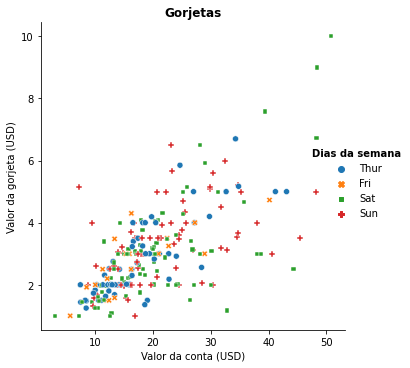

In [12]:
grafico.fig

* **Paleta de Cores**

> As paletas de cores podem ser conferidas no [link](https://seaborn.pydata.org/tutorial/color_palettes.html).

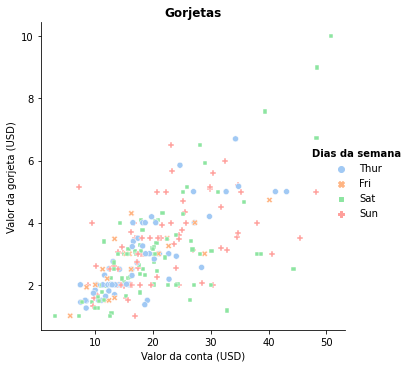

In [13]:
grafico = sns.relplot(data=data,x="total_bill", y="tip", hue="day", style="day", palette='pastel')

grafico.ax.set_title("Gorjetas", fontsize=12, fontweight="bold");
grafico.set_xlabels("Valor da conta (USD)", fontsize=10);
grafico.set_ylabels("Valor da gorjeta (USD)", fontsize=10);
grafico.legend.set_title("Dias da semana", prop={"size": 10, "weight": "bold"});

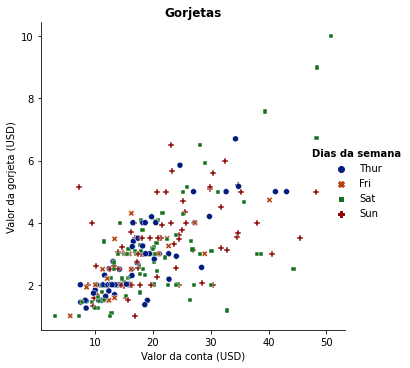

In [14]:
grafico = sns.relplot(data=data,x="total_bill", y="tip", hue="day", style="day", palette='dark')

grafico.ax.set_title("Gorjetas", fontsize=12, fontweight="bold");
grafico.set_xlabels("Valor da conta (USD)", fontsize=10);
grafico.set_ylabels("Valor da gorjeta (USD)", fontsize=10);
grafico.legend.set_title("Dias da semana", prop={"size": 10, "weight": "bold"});

* **Figura**

> Conversão: 1 polegada = 2.54 cm 

In [15]:
altura  = 10 / 2.54 
largura = 10 / 2.54

grafico.fig.set_size_inches(w=largura, h=altura)

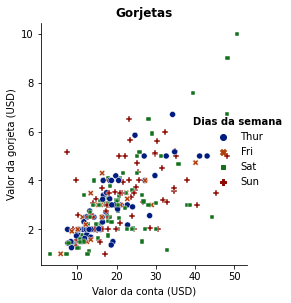

In [16]:
grafico.fig

In [17]:
altura  = 20 / 2.54
largura = 20 / 2.54

grafico.fig.set_size_inches(w=largura, h=altura)

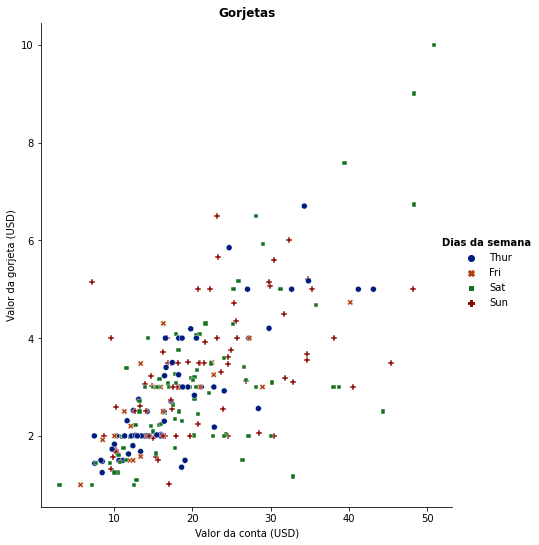

In [18]:
grafico.fig

In [19]:
grafico.fig.savefig(fname="gorjetas.png", bbox_inches="tight")

In [20]:
grafico.fig.savefig(fname="gorjetas.pdf", bbox_inches="tight")


## 2\. Categorias

### **2.1.  Gráfico de Barras** 

O **gráfico de barras** representa a relação entre uma variável categórica com uma variável numérica. Cada entidade da categoria é representada por uma barra, já a altura das barras representam os seus correspondente valor numérico. Útil para entender a distribuição de uma variável categórica.

> O método do pacote Seaborn que constrói este gráfico é o `barplot` ([doc](https://seaborn.pydata.org/generated/seaborn.barplot.html)). 

Algumas dicas:

 - Ordernar as barras pode gerar *insights*;
 - Barras horizontais podem facilitar a visualização.

Vamos utilizar a base de dados de **gorjetas**:

In [21]:
import seaborn as sns

data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


*   **Exemplo**: Valor da conta por dia da semana:

In [22]:
tips = data[["day", "total_bill"]].groupby("day").agg("sum").reset_index()
tips.head()

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


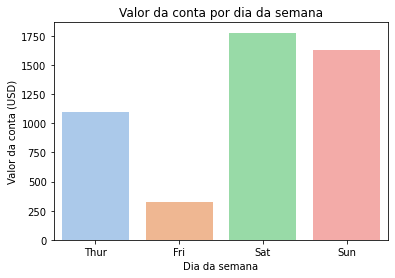

In [23]:
grafico = sns.barplot(data=tips, x="day", y="total_bill", ci=None, palette="pastel")
grafico.set(title='Valor da conta por dia da semana', xlabel='Dia da semana', ylabel='Valor da conta (USD)');

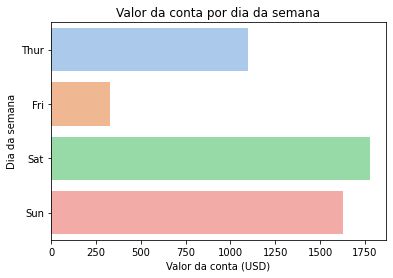

In [24]:
grafico = sns.barplot(data=tips, y="day", x="total_bill", ci=None, palette="pastel")
grafico.set(title='Valor da conta por dia da semana', ylabel='Dia da semana', xlabel='Valor da conta (USD)');

*   **Exemplo**: Valor da conta por dia da semana por período:

In [25]:
tips = data[["day", "total_bill", "time"]].groupby(["day", "time"]).agg("sum").reset_index()
tips.head(20)

,day,time,total_bill
0,Thur,Lunch,1077.55
1,Thur,Dinner,18.78
2,Fri,Lunch,89.92
3,Fri,Dinner,235.96
4,Sat,Lunch,NaN
5,Sat,Dinner,1778.40
6,Sun,Lunch,NaN
7,Sun,Dinner,1627.16


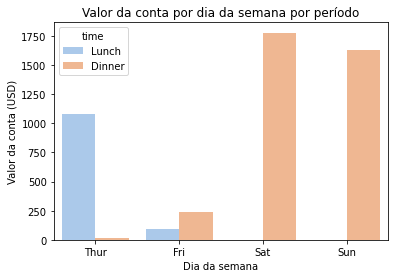

In [26]:
grafico = sns.barplot(data=tips, x="day", y="total_bill", hue="time", palette="pastel")
grafico.set(title='Valor da conta por dia da semana por período', xlabel='Dia da semana', ylabel='Valor da conta (USD)');

### **2.2. Gráfico de Setores** 

O **gráfico de setores**, também conhecido como **gráfico de pizza**, representa a proporção entre as entidades de uma variável categórica. Cada entidade da categoria é representada por uma setor de tamanho proporcional a sua respectiva proporção no todo.

> O pacote Seaborn **não possui suporte para gráficos de setores** e recomenda o uso de gráficos de barras. 

> O seu uso **não é recomendado**, em geral humanos não são bons para relacionar angulos com proporções.

Mas se for usar, seguem algumas dicas:

 - Se a proporção for em porcentagem, garanta que elas somem 100%;
 - Procure colocar a legenda no gráfico;
 - Não use gráficos 3D.

Vamos utilizar a base de dados **gorjetas**:

In [27]:
import seaborn as sns

data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


*   **Exemplo**: Proporção das gorjetas por dia da semana **com Pandas**:

In [28]:
tips = data[["tip", "day"]].groupby("day").agg("sum").reset_index()
tips["tip_percent"] = 100 * tips["tip"] / tips["tip"].sum()
tips.head()

,day,tip,tip_percent
0,Thur,171.83,23.487520
1,Fri,51.96,7.102436
2,Sat,260.40,35.594193
3,Sun,247.39,33.815851


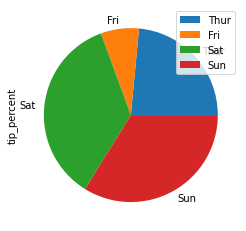

In [29]:
tips.plot.pie(y="tip_percent", labels=tips["day"]);

## 3\. Tendências

### **3.1. Gráfico de Linha** 

O **gráfico de linha** representa a evolução de uma variável numérica (eixo `y`), geralmente ao longo do tempo (eixo `x`), formando assim uma `série temporal`. Cada valor numérico é representado por pontos conectados por uma linha reta.

> O método do pacote Seaborn que constrói este gráfico é o `lineplot` ([doc](https://seaborn.pydata.org/generated/seaborn.lineplot.html)). 

Algumas dicas:

 - Se uma das colunas for temporal (anos, meses, dias, horas, etc.) garanta a ordenação cronológica;
 - Muitas linhas em um mesmo gráfico por dificultar a visualização.

Vamos utilizar a base de dados de **vôos**:

In [30]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


*   **Exemplo**: Número de passageiros por ano:

In [31]:
flights = data[["year", "passengers"]].groupby("year").agg("sum").reset_index()
flights.head()

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700


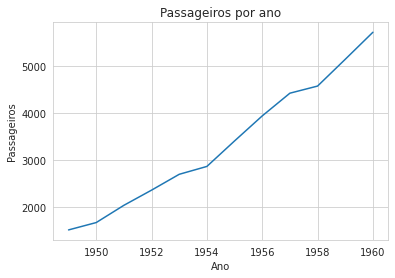

In [32]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=flights, x="year", y="passengers", palette="pastel")
  grafico.set(title='Passageiros por ano', xlabel='Ano', ylabel='Passageiros');

*   **Exemplo**: Número de passageiros por mês por ano:

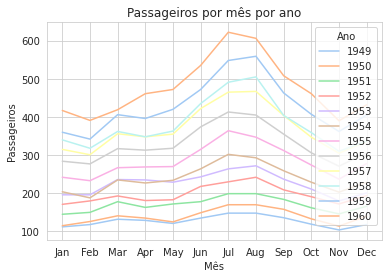

In [33]:
flights = data

with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x="month", y="passengers", hue="year", palette="pastel")
  grafico.set(title='Passageiros por mês por ano', xlabel='Mês', ylabel='Passageiros');
  grafico.get_legend().set_title("Ano");

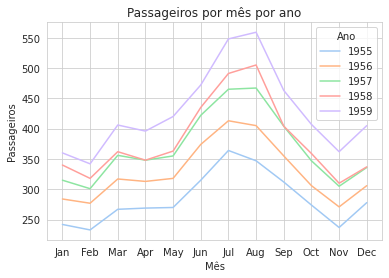

In [34]:
flights = data.query("1955 <= year < 1960")

with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=flights, x="month", y="passengers", hue="year", palette="pastel")
  grafico.set(title='Passageiros por mês por ano', xlabel='Mês', ylabel='Passageiros');
  grafico.get_legend().set_title("Ano");

### **3.2. Gráfico de Área** 

O **gráfico de área** é similar ao **gráfico de linha** e representa a evolução de uma variável numérica (eixo `y`), geralmente ao longo do tempo (eixo `x`), formando assim uma `série temporal`. Cada valor numérico é representado por pontos conectados por uma linha reta tendo ainda a área entre a linha e o eixo `x` preenchido por uma cor.

> O método do pacote Seaborn que constrói este gráfico é o `lineplot` ([doc](https://seaborn.pydata.org/generated/seaborn.lineplot.html)). 

Algumas dicas:

 - Se uma das colunas for temporal (anos, meses, dias, horas, etc.) garanta a ordenação cronológica;
 - Muitas áreas em um mesmo gráfico por dificultar a visualização.

Vamos utilizar a base de dados de **vôos**:

In [35]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


*   **Exemplo**: Número de passageiros por ano:

In [36]:
flights = data[["year", "passengers"]].groupby("year").agg("sum").reset_index()
flights.head()

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700


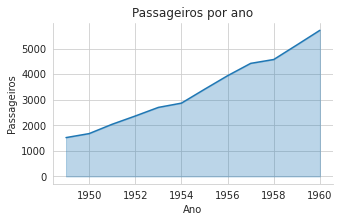

In [37]:
import matplotlib.pyplot as plt

with sns.axes_style('whitegrid'):

  grafico = sns.FacetGrid(data=flights, palette="pastel")
  grafico.map(sns.lineplot, "year", "passengers")
  grafico.map(plt.fill_between, 'year', 'passengers', alpha=0.3)
  grafico.set(title='Passageiros por ano', xlabel='Ano', ylabel='Passageiros');
  grafico.fig.set_size_inches(w=15/2.54, h=7.5/2.54)